   Age  Gender      Height     Weight        BMI  PhysicalActivityLevel  \
0   56    Male  173.575262  71.982051  23.891783                      4   
1   69    Male  164.127306  89.959256  33.395209                      2   
2   46  Female  168.072202  72.930629  25.817737                      4   
3   32    Male  168.459633  84.886912  29.912247                      3   
4   60    Male  183.568568  69.038945  20.487903                      3   

  ObesityCategory  
0   Normal weight  
1           Obese  
2      Overweight  
3      Overweight  
4   Normal weight  


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,596 (10.14 KB)

 Trainable params: 2,596 (10.14 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3812 - loss: 1.2697 - val_accuracy: 0.5400 - val_loss: 1.0946
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6077 - loss: 1.0464 - val_accuracy: 0.6800 - val_loss: 0.8892
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7563 - loss: 0.8248 - val_accuracy: 0.7850 - val_loss: 0.7147
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8563 - loss: 0.6527 - val_accuracy: 0.8700 - val_loss: 0.5824
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8827 - loss: 0.5352 - val_accuracy: 0.9050 - val_loss: 0.4854
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9179 - loss: 0.4518 - val_accuracy: 0.9000 - val_loss: 0.4128
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9118 - loss: 0.3877 - val_accuracy: 0.9150 - val_loss: 0.3546
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9059 - loss: 0.3241 - val_accuracy: 0.9150 - val_loss

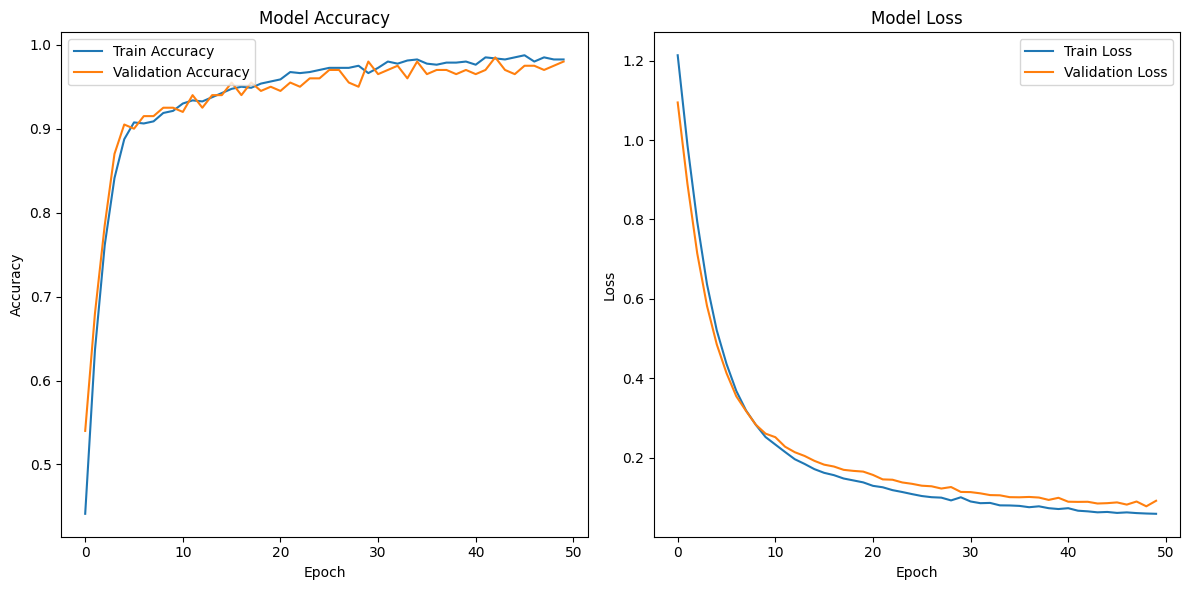

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


data = pd.read_csv("/content/sample_data/obesity_data.csv")


print(data.head())
X = data[["Age", "Height", "Weight", "PhysicalActivityLevel", "BMI"]]
Y = data["ObesityCategory"]

# Encode target labels
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)
Y_one_hot = to_categorical(Y_encoded)

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#plt.scatter(X_scaled[:, 1], X_scaled[:, 2], c=Y_encoded, cmap="viridis")
#plt.title("Hasil Distribusi Data")
#plt.show()


#Pisahkan kumpulan data menjadi training dan testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y_one_hot, test_size=0.2, random_state=42
)

#Membangun model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(4, activation="softmax"))

#compile model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

# Train model
history = model.fit(
    X_train,
    Y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, Y_test),
    verbose=1,
)


# Evaluasi model dengan data uji
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")
Y_pred = model.predict(X_test)
Y_pred_classes = Y_pred.argmax(axis=1)
Y_test_classes = Y_test.argmax(axis=1)
print("Classification Report:")
print(
    classification_report(
        Y_test_classes, Y_pred_classes, target_names=label_encoder.classes_
    )
)



plt.figure(figsize=(12, 6))
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
